<a href="https://colab.research.google.com/github/ALIVE-ABI/alive/blob/main/GOES_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download using command line

In [ ]:
#An alternative method using command line is simpler & faster, but it requires authentication of the command line tool gsutil
!gcloud init
!gsutil -m cp -r gs://gcp-public-data-goes-16/ABI-L2-BRFC/2023/054 /content

'''Gsutil is very useful for simple batch copying'cp' copies files from Google Cloud Buckets directly into the '/content' Colab folder, this is temporary storage during your session.
  Alternatively, you could downlod files to Google Drive by first connecting to Google Drive: from google.colab import drive
                                                                                              drive.mount(‘/content/drive’)
 -m runs the command in parallel using multi-threading which is high speed and efficient
 -r copies the entire directory tree, that is, every folder within the chosen folder (In this case, folder '200' has 24 hour folders within it, all of which are copied)
 gs://gcp-public-data-goes-16/ABI-L2-BRFC/2022/200 is the GOES bucket of interest, change the bucket name to retrieve different files
 See documentation here for help: https://cloud.google.com/storage/docs/gsutil/commands/cp '''

# Download using python module

In [ ]:
''' This script copies GOES ABI files from Google Cloud Buckets directly into the '/content' Colab folder, this is temporary storage during your session.
  Alternatively, you could downlod files to Google Drive by first connecting to Google Drive. To do so, uncomment the lines of code below '''

from google.cloud import storage
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Define GOES products/dates of interest
sat = '16'
product = 'ABI-L2-BRFC' # See all products here: https://console.cloud.google.com/storage/browser/gcp-public-data-goes-16
year = '2022'
day = '200' # Out of 365 days in a year, must be 3-digits, ie. day 1 = 001

In [ ]:
#Create the Google Cloud Bucket name:
bucket_name = 'gcp-public-data-goes-{sat}'.format(sat = sat)
prefix = '{product}/{year}/{day}'.format(product = product,
                                         year = year,
                                         day = day)

In [ ]:
#The following example copies 288 files (one full day of GOES CONUS imagery, ~1.6 GB) to Colab storage in 28 seconds
storage_client = storage.Client.create_anonymous_client()
bucket = storage_client.get_bucket(bucket_name)
blob_list = list(storage_client.list_blobs(bucket_name, prefix = prefix))
for file in blob_list:
  print(file)
  file_name = file.name.replace("/","_")
  out_file = '/content/' + file_name # If using Google Drive, replace with "/content/drive/ + file_name"
  each_blob = storage.Blob(file.name, bucket)
  ds = each_blob.download_to_filename(out_file)
  #From here, you could open each file to acess the data, ie. xr.open_dataset(ds)

# Create RGB image using BRF data



In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

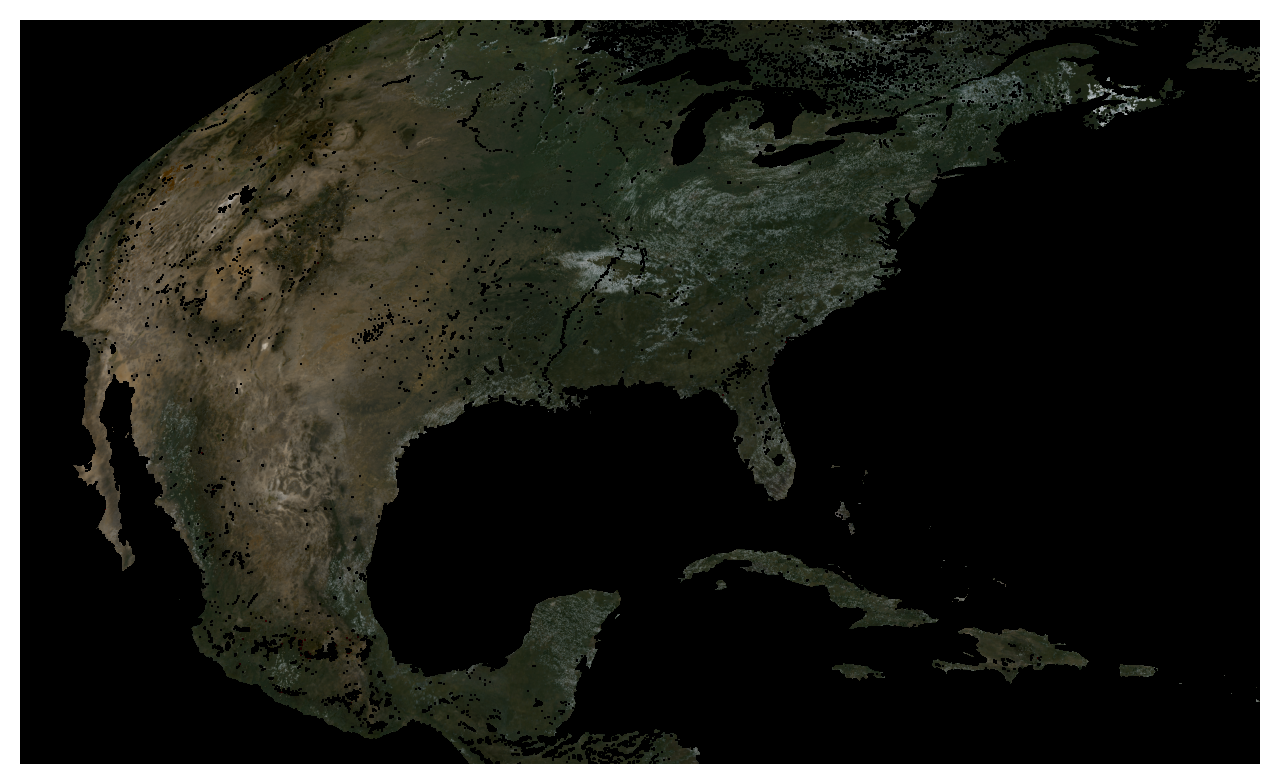

In [ ]:
# Open one BRF netCDF using xarray
f = xr.open_dataset('/content/ABI-L2-BRFC_2022_200_18_OR_ABI-L2-BRFC-M6_G16_s20222001801178_e20222001803551_c20222001805557.nc')

# Load the three bands into appropriate red (R), near-infrared (NIR), and blue (B) variables
B = f['BRF1'].data
R = f['BRF2'].data
NIR = f['BRF3'].data

# Correct the brightness levels of image with a gamma factor
gamma = 1.5
R = np.power(R, 1/gamma)
NIR = np.power(NIR, 1/gamma)
B = np.power(B, 1/gamma)

# Create a pseudo-green band
G_proxy = (0.45 * R) + (0.1 * NIR) + (0.45 * B)
RGB = np.dstack([R, G_proxy, B])

# Plot the variable to check if data loaded correctly
fig = plt.figure(figsize=(8,8),dpi=200)
im = plt.imshow(RGB)
plt.axis('off')
plt.show()

In [ ]:
ds = f['BRF1'].data
m,n = ds.shape
for i in range(1,m):
  for j in range(1,n):
    value = ds[i,j]
    print(value)
    #Instead of printing, you store each value in a dataframe
